In [85]:
import qiskit
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

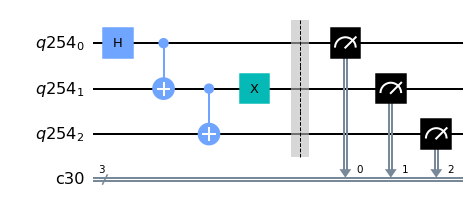

In [86]:
qr = qiskit.QuantumRegister(3)
cr = qiskit.ClassicalRegister(3)
circuit = qiskit.QuantumCircuit(qr, cr)

circuit.h(qr[0])        #Hadamard on 1st qubit
circuit.cnot(qr[0], qr[1])  #CNOT
circuit.cnot(qr[1], qr[2])  #CNOT
circuit.x(qr[1])        #X gate on 2nd qubit
circuit.barrier()
circuit.measure(qr, cr)

circuit.draw(output='mpl')

In [87]:
result = qiskit.execute(circuit, backend=qiskit.Aer.get_backend('qasm_simulator'), shots=1024).result()

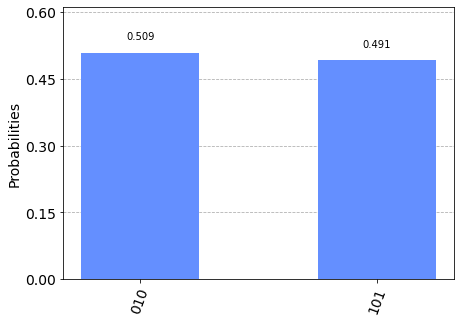

In [88]:
plot_histogram(result.get_counts(circuit))      #Ideal simulator results

8


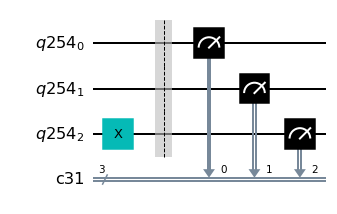

In [89]:
cal_circuit, state_labels = complete_meas_cal(qr=qr, circlabel='Meas_error_mitigation_calculator')
print(len(cal_circuit))     #Number of combinations created by ignis
cal_circuit[4].draw(output='mpl')   #Drawing the circuit for the ignis created circuit number 4

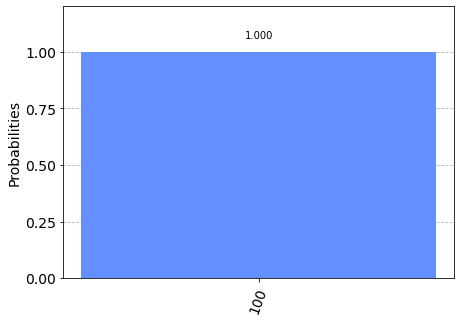

In [90]:
#Get results from the ignis generated circuits
ignis_result = qiskit.execute(cal_circuit[4], backend=qiskit.Aer.get_backend('qasm_simulator'), shots=1024).result()      # For circuit[4]
plot_histogram(ignis_result.get_counts(cal_circuit[4]))      #Ignis results

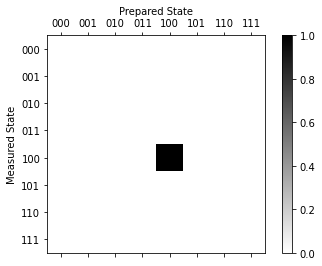

In [91]:
meas_fitter = CompleteMeasFitter(ignis_result, state_labels=state_labels)
meas_fitter.plot_calibration()      # For all the states in the ignis generated circuits